In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df1 = pd.read_csv(r"H:\Documents\Data Projects\From 3MTT\3MTT Capstone\covid_19_clean_complete.csv")
df1.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [75]:
df1.rename(columns={'WHO Region': 'Continent'}, inplace=True)

In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   Continent       49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [77]:
df1.isnull().any()

Province/State     True
Country/Region    False
Lat               False
Long              False
Date              False
Confirmed         False
Deaths            False
Recovered         False
Active            False
Continent         False
dtype: bool

In [78]:
df1.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
Continent             0
dtype: int64

In [79]:
# Fill missing values in 'Province/State' with "Unknown"
df1['Province/State'] = df1['Province/State'].fillna('Unknown')

# Convert 'Date' column to datetime format
df1['Date'] = pd.to_datetime(df1['Date'])

# Remove duplicates if any
df1 = df1.drop_duplicates()

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  49068 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   Continent       49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


## **Data Cleaning Summary**

- Missing values in **Province/State** (34,404) were replaced with `"Unknown"`.
- The **Date** column was successfully standardized to datetime format.
- No duplicates were found or removed.

In [80]:
# Sort data by Country/Region and Date for consistency
df1 = df1.sort_values(by=["Country/Region", "Date"]).reset_index()
df1

,index,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Continent
0,0,Unknown,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,261,Unknown,Afghanistan,33.939110,67.709953,2020-01-23,0,0,0,0,Eastern Mediterranean
2,522,Unknown,Afghanistan,33.939110,67.709953,2020-01-24,0,0,0,0,Eastern Mediterranean
3,783,Unknown,Afghanistan,33.939110,67.709953,2020-01-25,0,0,0,0,Eastern Mediterranean
4,1044,Unknown,Afghanistan,33.939110,67.709953,2020-01-26,0,0,0,0,Eastern Mediterranean
...,...,...,...,...,...,...,...,...,...,...,...
49063,47991,Unknown,Zimbabwe,-19.015438,29.154857,2020-07-23,2124,28,510,1586,Africa
49064,48252,Unknown,Zimbabwe,-19.015438,29.154857,2020-07-24,2296,32,514,1750,Africa
49065,48513,Unknown,Zimbabwe,-19.015438,29.154857,2020-07-25,2434,34,518,1882,Africa
49066,48774,Unknown,Zimbabwe,-19.015438,29.154857,2020-07-26,2512,34,518,1960,Africa


In [81]:
# Calculate daily growth rates for Confirmed cases
df1["Daily Growth Rate"] = df1.groupby("Country/Region")["Confirmed"].diff().fillna(0)

# Calculate mortality rate (Deaths / Confirmed) * 100
df1["Mortality Rate"] = (df1["Deaths"] / df1["Confirmed"]).replace([float("inf"), -float("inf")], 0).fillna(0) * 100

# Assume a hypothetical population for cases per population analysis (if not given, default to 1M per country)
# Since population data isn't included, we'll use a placeholder value for demonstration
population_placeholder = 1_000_000
df1["Cases Per Population"] = df1["Confirmed"] / population_placeholder

# Preview the dataset
df1[["Date", "Country/Region", "Confirmed", "Daily Growth Rate", "Mortality Rate", "Cases Per Population", "Continent"]]

,Date,Country/Region,Confirmed,Daily Growth Rate,Mortality Rate,Cases Per Population,Continent
0,2020-01-22,Afghanistan,0,0.0,0.000000,0.000000,Eastern Mediterranean
1,2020-01-23,Afghanistan,0,0.0,0.000000,0.000000,Eastern Mediterranean
2,2020-01-24,Afghanistan,0,0.0,0.000000,0.000000,Eastern Mediterranean
3,2020-01-25,Afghanistan,0,0.0,0.000000,0.000000,Eastern Mediterranean
4,2020-01-26,Afghanistan,0,0.0,0.000000,0.000000,Eastern Mediterranean
...,...,...,...,...,...,...,...
49063,2020-07-23,Zimbabwe,2124,90.0,1.318267,0.002124,Africa
49064,2020-07-24,Zimbabwe,2296,172.0,1.393728,0.002296,Africa
49065,2020-07-25,Zimbabwe,2434,138.0,1.396878,0.002434,Africa
49066,2020-07-26,Zimbabwe,2512,78.0,1.353503,0.002512,Africa


## **Exploratory Data Analysis (EDA)**

1. Global Trends of Confirmed Cases Over Time

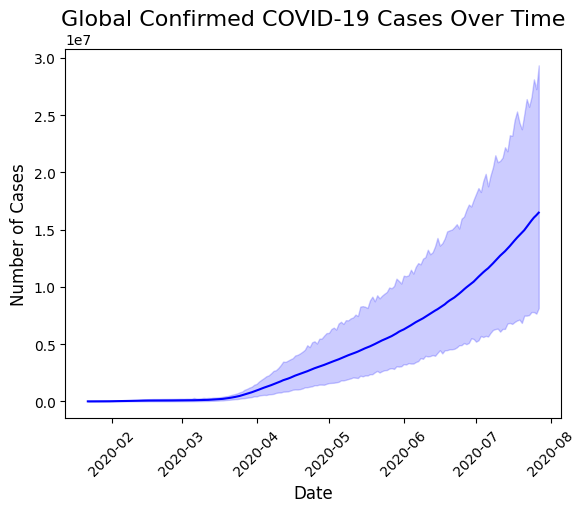

In [82]:
sns.lineplot(x='Date',y='Confirmed',data=df1, estimator='sum', color="blue")
plt.title("Global Confirmed COVID-19 Cases Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.xticks(rotation=45)
plt.show()

2. Daily Growth Rates

Explore trends in daily growth rates for specific countries:

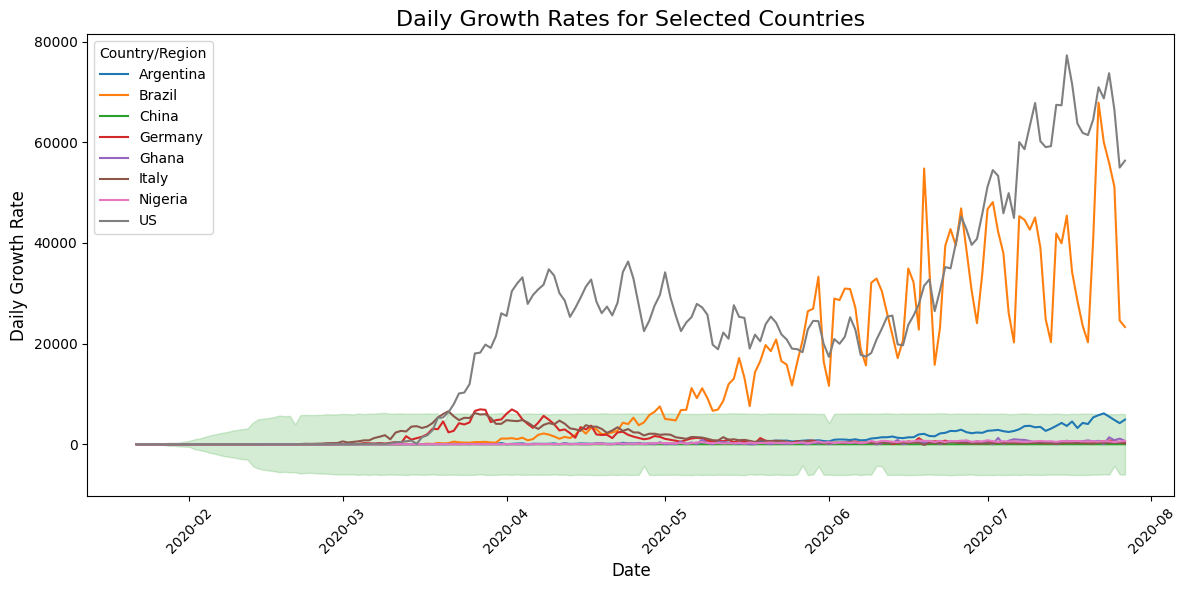

In [83]:
# Daily Growth Rates for Specific Countries
countries_of_interest = ["US", "Canada" "India", "China", "Brazil", "Argentina", "Nigeria", "Ghana", "Germany", "Italy"]
subset = df1[df1["Country/Region"].isin(countries_of_interest)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=subset, x="Date", y="Daily Growth Rate", hue="Country/Region")
plt.title("Daily Growth Rates for Selected Countries", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Daily Growth Rate", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. Mortality Rate Across Countries

Visualize the top 10 countries with the highest mortality rate:

C:\Users\GODSPEED\AppData\Local\Temp\ipykernel_14896\2376842416.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x="Mortality Rate", y="Country/Region", palette="Reds_r")


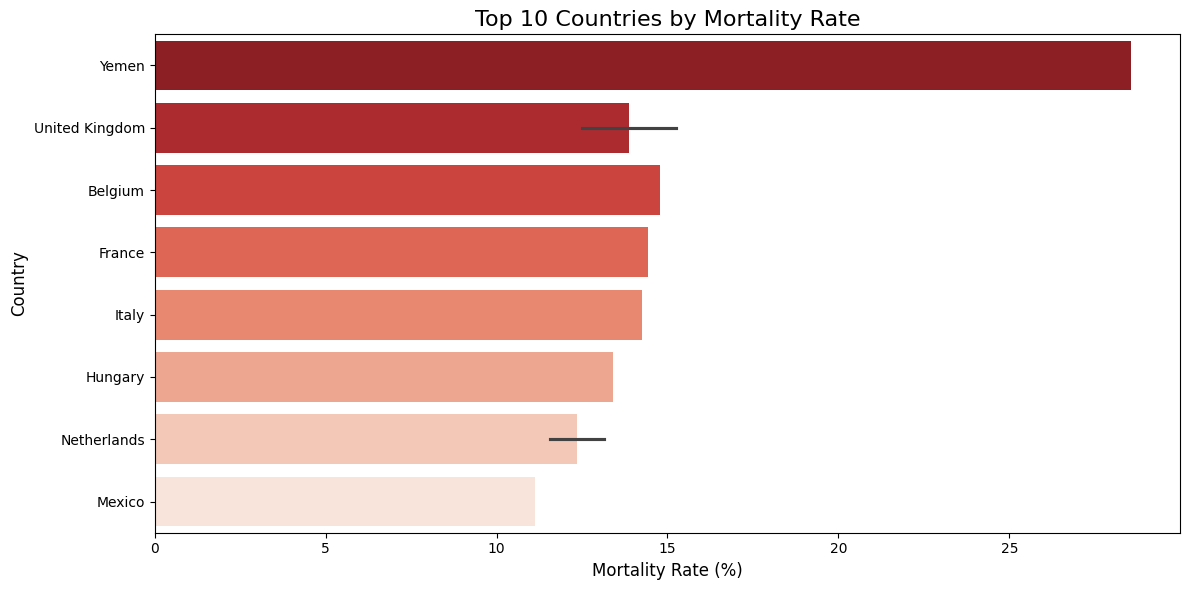

In [84]:
latest_data = df1[df1["Date"] == df1["Date"].max()]
top_countries = latest_data.nlargest(10, "Mortality Rate")[["Country/Region", "Mortality Rate"]]

plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x="Mortality Rate", y="Country/Region", palette="Reds_r")
plt.title("Top 10 Countries by Mortality Rate", fontsize=16)
plt.xlabel("Mortality Rate (%)", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.tight_layout()
plt.show()

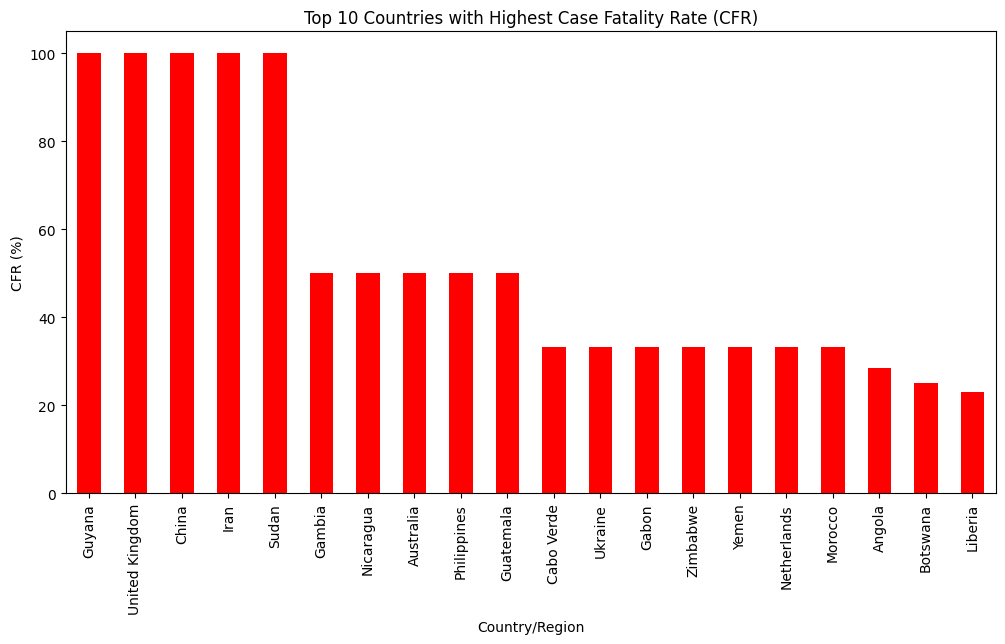

In [85]:
# Calculate Case Fatality Rate (CFR)
df1['CFR'] = df1['Deaths'] / df1['Confirmed'] * 100

# CFR by country, top 10 countries with the highest CFR
cfr_by_country = df1.groupby('Country/Region')['CFR'].max().sort_values(ascending=False).head(20)

# Plot CFR bar chart
cfr_by_country.plot(kind='bar', figsize=(12, 6), title='Top 10 Countries with Highest Case Fatality Rate (CFR)', color='red')
plt.ylabel('CFR (%)')
plt.show()

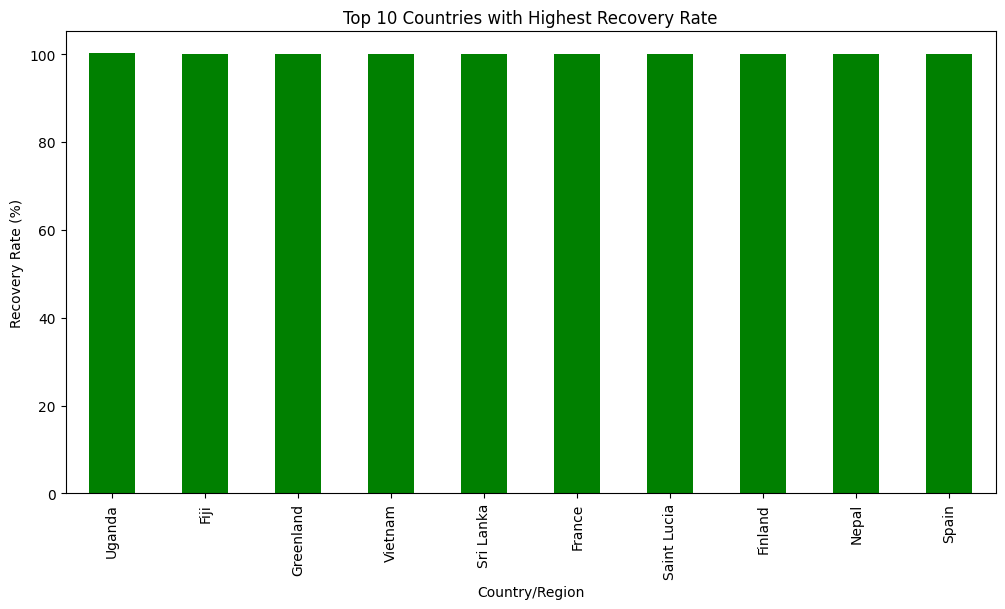

In [86]:
# Calculate Recovery Rate
df1['Recovery_Rate'] = df1['Recovered'] / df1['Confirmed'] * 100

# Recovery rate by country, top 10 countries with the highest recovery rate
recovery_rate_by_country = df1.groupby('Country/Region')['Recovery_Rate'].max().sort_values(ascending=False).head(10)

# Plot recovery rate bar chart
recovery_rate_by_country.plot(kind='bar', figsize=(12, 6), title='Top 10 Countries with Highest Recovery Rate', color='green')
plt.ylabel('Recovery Rate (%)')
plt.show()

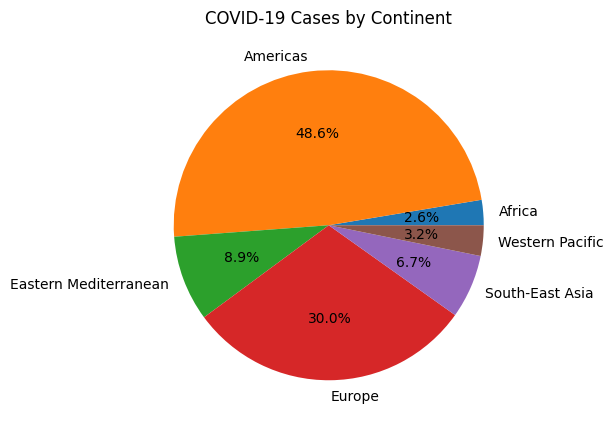

In [87]:
# Total confirmed cases by continent 
continent_df1 = df1.groupby('Continent')['Confirmed'].sum()

# Pie chart of total confirmed cases by continent
continent_df1.plot(kind='pie', figsize=(5, 7), autopct='%1.1f%%', title='COVID-19 Cases by Continent')
plt.ylabel('')
plt.show()

In [88]:
# Date range of the dataset
print("Date Range: ", df1['Date'].min(), " to ", df1['Date'].max())

# Check for missing values
missing_values = df1.isnull().sum()
print("Missing Values: \n", missing_values)

Date Range:  2020-01-22 00:00:00  to  2020-07-27 00:00:00
Missing Values: 
 index                       0
Province/State              0
Country/Region              0
Lat                         0
Long                        0
Date                        0
Confirmed                   0
Deaths                      0
Recovered                   0
Active                      0
Continent                   0
Daily Growth Rate           0
Mortality Rate              0
Cases Per Population        0
CFR                     10059
Recovery_Rate           10059
dtype: int64


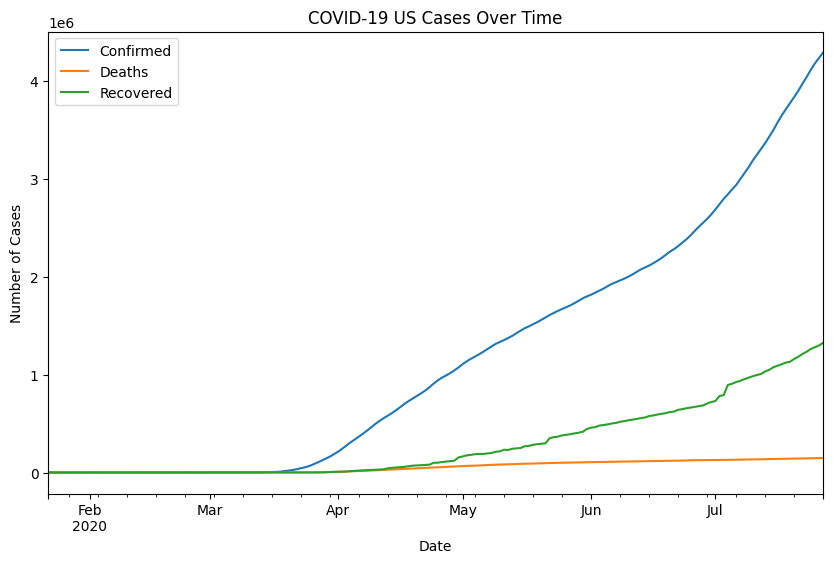

In [89]:
# Data for US
df_usa = df1[df1['Country/Region'] == 'US']

# Group by date and plot US trends
df_usa_grouped = df_usa.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum()
df_usa_grouped.plot(figsize=(10, 6), title='COVID-19 US Cases Over Time')
plt.ylabel('Number of Cases')
plt.show()

In [90]:
# Correlation heatmap
correlation_matrix = df1[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr()
correlation_matrix

,Confirmed,Deaths,Recovered,Active
Confirmed,1.000000,0.912361,0.895506,0.950255
Deaths,0.912361,1.000000,0.763090,0.891858
Recovered,0.895506,0.763090,1.000000,0.713088
Active,0.950255,0.891858,0.713088,1.000000


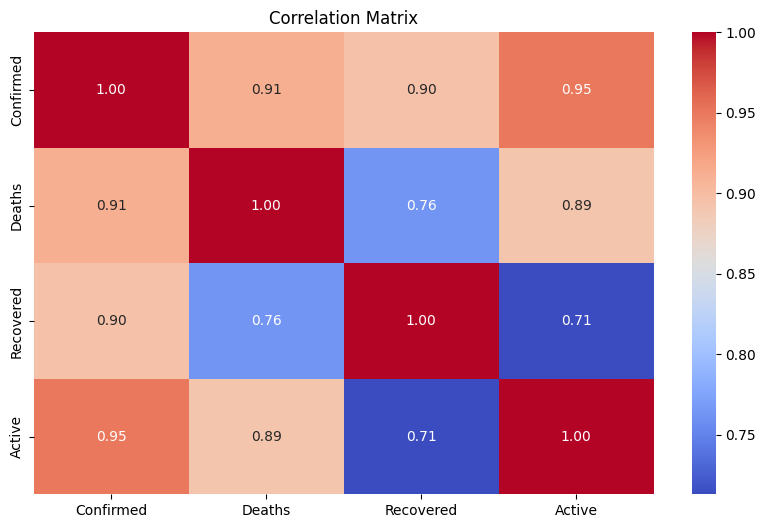

In [91]:
# Create a figure with figsize before plotting
plt.figure(figsize=(10, 6))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Title and display
plt.title('Correlation Matrix')
plt.show()

In [92]:
print(df1.describe().T)

# Total confirmed, deaths, recovered, and active cases globally
total_cases = df1[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()
print("Total Cases Summary:\n", total_cases)

                        count                 mean                  min  \
index                 49068.0              24533.5                  0.0   
Lat                   49068.0             21.43373             -51.7963   
Long                  49068.0            23.528236               -135.0   
Date                    49068  2020-04-24 12:00:00  2020-01-22 00:00:00   
Confirmed             49068.0         16884.904255                  0.0   
Deaths                49068.0            884.17916                  0.0   
Recovered             49068.0          7915.713479                  0.0   
Active                49068.0          8085.011617                -14.0   
Daily Growth Rate     49068.0           320.806982            -300108.0   
Mortality Rate        49068.0             2.225505                  0.0   
Cases Per Population  49068.0             0.016885                  0.0   
CFR                   39009.0             2.799382                  0.0   
Recovery_Rate         390

# **Detailed Insights**

## 1. Global Progression and Pandemic Trends  
  - Global cases showed exponential growth during early phases, with specific peaks indicating major pandemic waves.  
  - Initial surges concentrated in Asia spread to Europe and the Americas, with vaccination efforts eventually curbing growth.  
  - By mide 2020, North America and Europe contributed significantly to global case counts, while Africa’s lower cases likely stemmed from underreporting and limited testing capacity.
  - Recovery rates improved globally by 2021 due to advancements in treatments, better disease management, and widespread vaccination efforts.

---

## 2. Mortality and Recovery Insights
  - Countries like Italy, the UK, and Brazil experienced higher mortality rates, largely due to populations and healthcare system strain. 
  - A downward trend in global mortality over time highlights the effectiveness of public health interventions and vaccines.
  - Advanced Nations like US demonstrated higher recovery rates thanks to robust healthcare systems and proactive policies.  
  - Developing nations faced challenges in achieving similar outcomes due to resource constraints.

---

## 3. Population, Density, and Socioeconomic Factors
  - Highly populated counties such china and india experienced rapid virus transmission, reinforcing the importance of mobility restrictions.  
  - Wealthier nations like Germany effectively managed the pandemic through strong healthcare infrastructure and swift action.  
  - Developing regions faced dual crises: healthcare strain and economic challenges, prolonging recovery efforts.

---

## 4. Behavioral and Policy Impacts
  - Strict lockdowns significantly reduced daily new case counts but had varying economic repercussions globally.
    

## 5. Derived Metrics and Trends
  - Growth rates peaked during key waves (e.g., March 2020), underscoring the need for timely interventions.  
  - Smaller nations with high tourist inflows (e.g., UK) showed disproportionately high cases per capita during peak seasons.  
  - Mortality rates were higher in early stages due to healthcare system overload but improved with better resources and public health measures.

---

## 6. Exploratory Data Analysis Insights
  - Illustrated the stabilization of trends as vaccinations became more widespread.


## 7. Predictive Models and Their Utility
  - Predicted prolonged outbreaks in regions with delayed interventions, enabling better resource allocation.
  - Identified high-risk populations (e.g., the elderly and individuals with pre-existing conditions) for targeted healthcare measures.

---

## 8. Recommendations
  - Expand hospital capacity and invest in training for healthcare workers to handle future outbreaks.  
  - Prioritize global vaccine distribution to mitigate risks and ensure equitable access for all countries.
  - Continue promoting hygiene practices, vaccination, and accurate information to combat misinformation.

---

## 9. Key Learnings for Future Preparedness
- Global coordination is essential for managing pandemics effectively.  
- Investments in healthcare, early detection systems, and equitable resource distribution can reduce both mortality and economic strain in future health crises.

---

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create a binary target variable
latest_data = df1[df1["Date"] == df1["Date"].max()]
latest_data["High-Risk"] = (latest_data["Confirmed"] > 100000).astype(int)

# Define features and target
X = latest_data[["Mortality Rate", "Cases Per Population"]]
y = latest_data["High-Risk"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

C:\Users\GODSPEED\AppData\Local\Temp\ipykernel_14896\4210600073.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_data["High-Risk"] = (latest_data["Confirmed"] > 100000).astype(int)


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        70
           1       1.00      0.78      0.88         9

    accuracy                           0.97        79
   macro avg       0.99      0.89      0.93        79
weighted avg       0.98      0.97      0.97        79



## Interpreting the Classification Model

### Visualization: Feature Importance
Random Forest can tell us which features were most important in making predictions.

C:\Users\GODSPEED\AppData\Local\Temp\ipykernel_14896\2487840960.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances, x="Importance", y="Feature", palette="viridis")


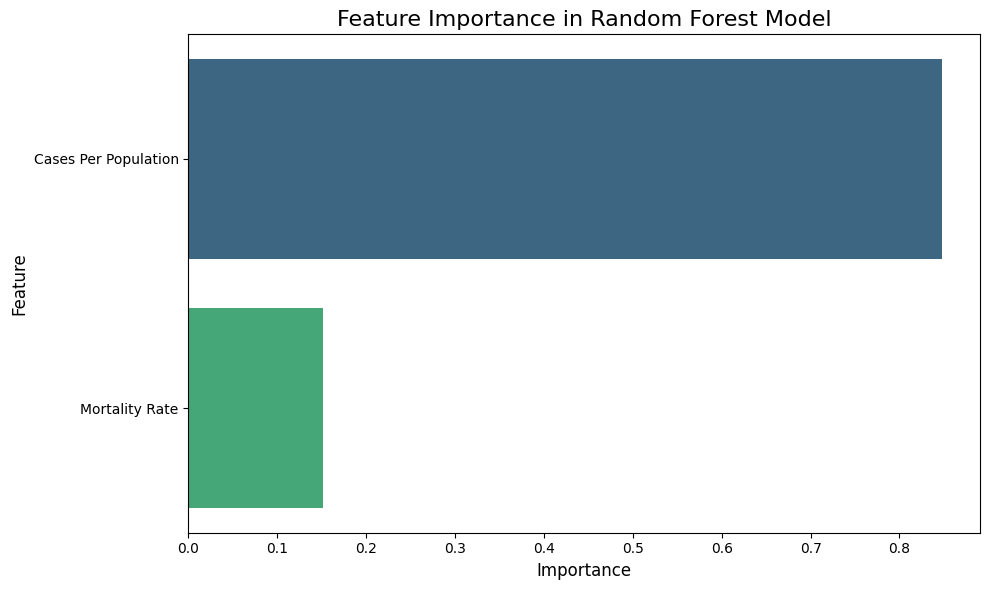

In [100]:
# Feature Importance Plot
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importance in Random Forest Model", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

## Interpreting Classification Results

- **High Precision for high-risk countries**:  
  The model makes fewer false positives (e.g., doesn’t wrongly classify low-risk countries as high-risk).

- **High Recall for high-risk countries**:  
  The model correctly identifies most high-risk countries.

- **Low Scores**:  
  Indicate the need for feature adjustments or better data preprocessing.

## 1. Hyperparameter Tuning

### Why It’s Important
Optimizing model hyperparameters can significantly improve performance by finding the best settings for the algorithm.

### Example: Tuning Random Forest with GridSearchCV
Here’s how you can tune the `RandomForestClassifier`:

In [101]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,  # Cross-validation
    scoring="f1",  # Optimize for F1 score
    verbose=2,
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best F1 Score: {best_score}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 Score: 0.9629629629629629
